In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

#### You can find the dataset for this project on Kaggle: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [3]:
# Load in the data
CCdata = pd.read_csv("creditcard.csv")

In [4]:
# Take a look
CCdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Class of 1 indicates a fraudulent charge
CCdata['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### The dataset shows a significant imbalance with 284,315 non-fraudulent transactions and only 492 fraudulent ones.



In [6]:
# Separate the data to create a training model
x = CCdata.drop('Class', axis=1)
y = CCdata['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42, stratify=y)

## Scaling the Data

Scaling the data is an important preprocessing step in machine learning. Many machine learning algorithms, such as logistic regression and random forest, perform better when the features are on a similar scale. This is especially true for algorithms that use distance-based metrics or gradient-based optimization.

### Why Scale the Data?

- **Improved Convergence:** Algorithms that use gradient descent (e.g., logistic regression) converge faster when the data is scaled, as the gradients are more balanced.
- **Better Performance:** Models like k-nearest neighbors and support vector machines that rely on distance metrics perform more accurately when the features are scaled.
- **Consistency:** Scaling ensures that no single feature dominates the others, leading to more consistent and reliable model performance.

In this project, I will use the `StandardScaler` from scikit-learn to scale the data. This scaler standardizes the features by removing the mean and scaling to unit variance.



In [7]:
# Scale the data
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

## Initial Testing with Original Imbalanced Data

To start, I will test the performance of the models using the original imbalanced data. This will provide a baseline to compare the effectiveness of the different resampling techniques. By evaluating the models on the unaltered dataset, I can observe how class imbalance affects the performance metrics such as accuracy, precision, recall, F1 score, and ROC.


In [8]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

## Logistic Regression Model

### What is Logistic Regression?

Logistic regression is a statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). In the context of this project, the two outcomes are whether a transaction is fraudulent or not.

### Why Use Logistic Regression?

- **Binary Classification:** Logistic regression is well-suited for binary classification problems like fraud detection, where the outcome is either fraud or no fraud.
- **Interpretability:** The coefficients of a logistic regression model can be easily interpreted to understand the influence of different features on the probability of fraud.
- **Efficiency:** Logistic regression is computationally efficient and performs well on large datasets, making it a good choice for this problem.
- **Baseline Model:** Logistic regression serves as a good baseline model. By first evaluating logistic regression, we can establish a benchmark to compare the performance of more complex models and resampling techniques.

In this project, I will start by applying logistic regression to the original imbalanced dataset. This will help establish a baseline for performance metrics such as accuracy, precision, recall, F1 score, and ROC AUC.


In [9]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(x_test)

In [10]:
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

In [11]:
# Print Logistic Regression metrics
print(f'Logistic Regression - Confusion Matrix:\n{conf_matrix_log_reg}')
print(f'Logistic Regression - Accuracy: {accuracy_log_reg}')
print(f'Logistic Regression - Precision: {precision_log_reg}')
print(f'Logistic Regression - Recall: {recall_log_reg}')
print(f'Logistic Regression - F1 Score: {f1_log_reg}')
print(f'Logistic Regression - ROC AUC: {roc_auc_log_reg}')

Logistic Regression - Confusion Matrix:
[[56851    13]
 [   34    64]]
Logistic Regression - Accuracy: 0.9991748885221726
Logistic Regression - Precision: 0.8311688311688312
Logistic Regression - Recall: 0.6530612244897959
Logistic Regression - F1 Score: 0.7314285714285713
Logistic Regression - ROC AUC: 0.8264163044227257


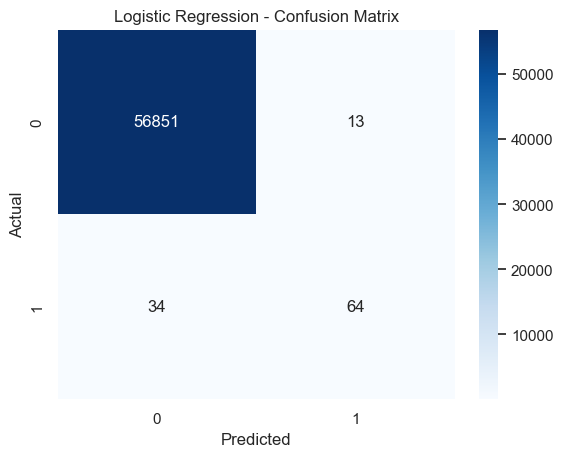

In [97]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

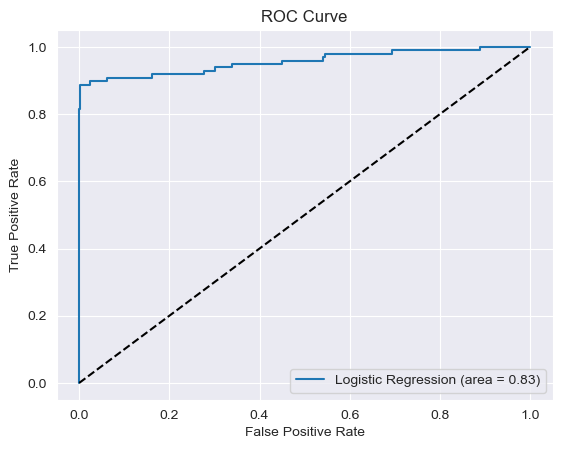

In [13]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 56,851
- **False Positives (FP):** 13
- **False Negatives (FN):** 34
- **True Positives (TP):** 64

### Analysis

The logistic regression model on the original imbalanced data has an impressively high accuracy of 99.92%, which might be misleading due to the class imbalance. Since the majority class (non-fraudulent transactions) dominates, the model achieves high accuracy by mostly predicting the majority class correctly.

- **Precision:** The precision of 0.831 indicates that when the model predicts a transaction as fraudulent, it is correct 83.1% of the time. This is relatively high, showing good performance in identifying true positives.
- **Recall:** The recall of 0.653 indicates that the model correctly identifies 65.3% of the actual fraudulent transactions. This is lower than the precision, suggesting that the model misses some fraudulent transactions.
- **F1 Score:** The F1 score of 0.731 is a balance between precision and recall, indicating that the model has a fair balance between identifying true positives and avoiding false negatives.
- **ROC AUC:** The ROC AUC of 0.826 shows that the model has good discriminative ability, performing well in distinguishing between the positive and negative classes.

These results highlight the need for resampling techniques to improve the recall and overall performance of the model, ensuring it can better detect fraudulent transactions.


In [14]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## Random Forest Model

### What is Random Forest?

Random forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It combines the concept of "bagging" (bootstrap aggregating) with the random selection of features, leading to robust and generalizable models.

### Why Use Random Forest?

- **Handling Imbalanced Data:** Random forest can handle imbalanced datasets well by adjusting class weights or using balanced subsampling.
- **Robustness:** By averaging multiple decision trees, random forest reduces the risk of overfitting and increases robustness.
- **Feature Importance:** Random forest provides insights into feature importance, helping to understand which features are most influential in predicting fraud.
- **High Performance:** Random forest often achieves high accuracy and good performance on various types of data and is less sensitive to noise compared to individual decision trees.

In this project, I will apply a random forest model to the original imbalanced dataset to compare its performance with logistic regression. This will provide a more comprehensive understanding of how different models perform on the fraud detection task.


In [15]:
# Predict on the test set
y_pred_rf = rf.predict(x_test)

In [16]:
# Evaluate the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [17]:
# Print Random Forest metrics
print(f'Random Forest - Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest - Accuracy: {accuracy_rf}')
print(f'Random Forest - Precision: {precision_rf}')
print(f'Random Forest - Recall: {recall_rf}')
print(f'Random Forest - F1 Score: {f1_rf}')
print(f'Random Forest - ROC AUC: {roc_auc_rf}')

Random Forest - Confusion Matrix:
[[56858     6]
 [   17    81]]
Random Forest - Accuracy: 0.9995962220427653
Random Forest - Precision: 0.9310344827586207
Random Forest - Recall: 0.826530612244898
Random Forest - F1 Score: 0.8756756756756757
Random Forest - ROC AUC: 0.9132125486660618


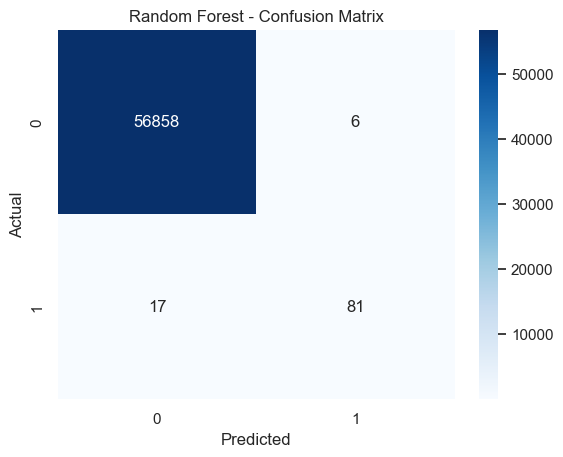

In [98]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.savefig('rf_cm.png')
plt.show()

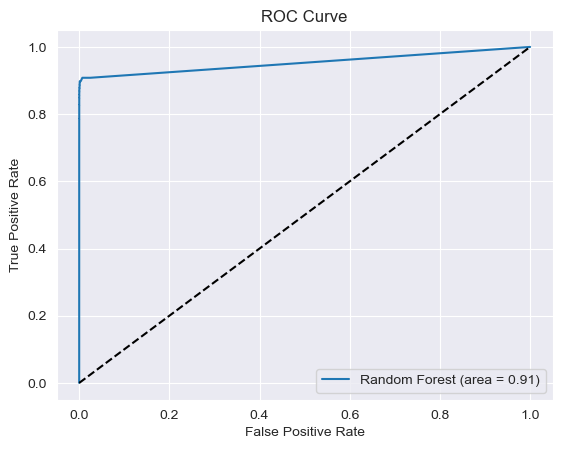

In [19]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 56,858
- **False Positives (FP):** 6
- **False Negatives (FN):** 17
- **True Positives (TP):** 81


### Analysis

The random forest model on the original imbalanced data shows a very high accuracy of 99.96%, slightly higher than the logistic regression model. Again, due to the class imbalance, high accuracy can be misleading, so we consider other metrics for a more comprehensive evaluation.

- **Precision:** The precision of 0.931 indicates that when the model predicts a transaction as fraudulent, it is correct 93.1% of the time. This high precision suggests that the model makes very few false positive errors.
- **Recall:** The recall of 0.826 indicates that the model correctly identifies 82.7% of the actual fraudulent transactions. This is a significant improvement over the logistic regression model, showing better performance in detecting fraud.
- **F1 Score:** The F1 score of 0.875 balances precision and recall, indicating that the model has a strong ability to detect true positives while minimizing false negatives.
- **ROC AUC:** The ROC AUC of 0.913 shows that the model has excellent discriminative ability, performing very well in distinguishing between the positive and negative classes.

These results suggest that the random forest model performs better than the logistic regression model in detecting fraudulent transactions, particularly in terms of recall and overall balance between precision and recall. However, further improvements might still be made by applying resampling techniques to handle the class imbalance.


## Resampling Techniques

In this section, I will implement and compare different resampling techniques to handle the class imbalance. These techniques include:

- **SMOTE (Synthetic Minority Over-sampling Technique)**
- **ADASYN (Adaptive Synthetic Sampling)**
- **Hybrid Approaches (SMOTE + Tomek Links and SMOTE + ENN)**


In [20]:
# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [21]:
y_train_smote.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [22]:
#Train logistic regression model
log_reg_smote = LogisticRegression()
log_reg_smote.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [23]:
#predict on the test set
y_pred_log_reg_smote = log_reg_smote.predict(x_test)

In [24]:
conf_matrix_log_reg_smote = confusion_matrix(y_test, y_pred_log_reg_smote)
accuracy_log_reg_smote = accuracy_score(y_test, y_pred_log_reg_smote)
precision_log_reg_smote = precision_score(y_test, y_pred_log_reg_smote)
recall_log_reg_smote = recall_score(y_test, y_pred_log_reg_smote)
f1_log_reg_smote = f1_score(y_test, y_pred_log_reg_smote)
roc_auc_log_reg_smote = roc_auc_score(y_test, y_pred_log_reg_smote)

In [25]:
# Print Logistic Regression metrics
print(f'Logistic Regression SMOTE - Confusion Matrix:\n{conf_matrix_log_reg_smote}')
print(f'Logistic Regression SMOTE - Accuracy: {accuracy_log_reg_smote}')
print(f'Logistic Regression SMOTE - Precision: {precision_log_reg_smote}')
print(f'Logistic Regression SMOTE - Recall: {recall_log_reg_smote}')
print(f'Logistic Regression SMOTE - F1 Score: {f1_log_reg_smote}')
print(f'Logistic Regression SMOTE - ROC AUC: {roc_auc_log_reg_smote}')

Logistic Regression SMOTE - Confusion Matrix:
[[55401  1463]
 [    8    90]]
Logistic Regression SMOTE - Accuracy: 0.9741757663003405
Logistic Regression SMOTE - Precision: 0.05795235028976175
Logistic Regression SMOTE - Recall: 0.9183673469387755
Logistic Regression SMOTE - F1 Score: 0.10902483343428225
Logistic Regression SMOTE - ROC AUC: 0.9463196470203162


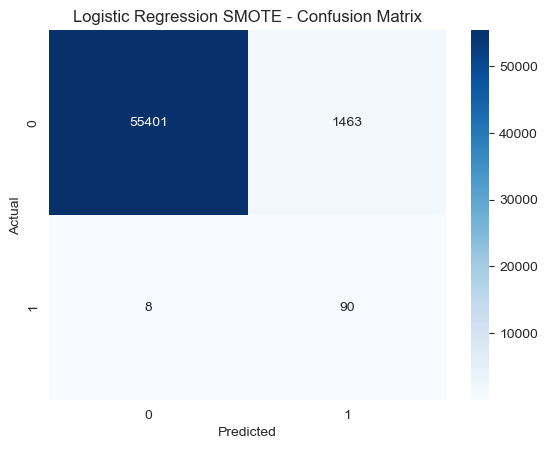

In [26]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression SMOTE - Confusion Matrix')
plt.show()

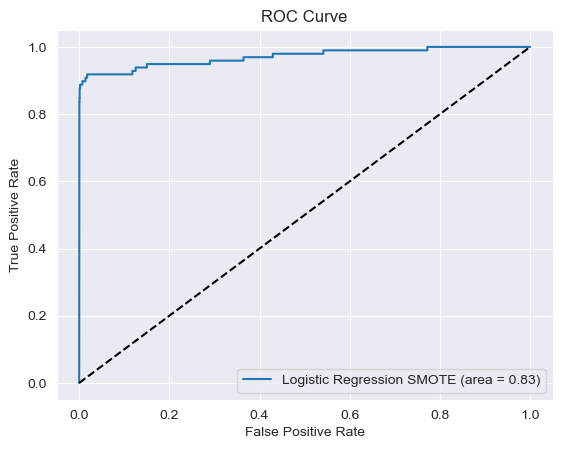

In [27]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression SMOTE (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 55,401
- **False Positives (FP):** 1,463
- **False Negatives (FN):** 8
- **True Positives (TP):** 90


### Analysis

The logistic regression model with SMOTE resampling shows a noticeable shift in performance metrics due to the balanced class distribution:

- **Precision:** The precision of 0.058 indicates that when the model predicts a transaction as fraudulent, it is correct only 5.8% of the time. This low precision is due to the high number of false positives introduced by SMOTE.
- **Recall:** The recall of 0.918 indicates that the model correctly identifies 91.8% of the actual fraudulent transactions. This is a significant improvement over the model trained on the original imbalanced data, highlighting SMOTE's effectiveness in increasing the detection of true positives.
- **F1 Score:** The F1 score of 0.109 balances precision and recall, indicating that while the recall has improved, the overall performance is affected by the low precision.
- **ROC AUC:** The ROC AUC of 0.946 indicates that the model has a strong ability to distinguish between the positive and negative classes, which is an improvement from the original imbalanced model.

These results suggest that while SMOTE significantly improves the recall, it also introduces a high number of false positives, leading to low precision. This trade-off highlights the importance of carefully choosing and tuning resampling techniques based on the specific application and desired outcomes. Further tuning or combining SMOTE with other techniques, such as Tomek Links or ENN, may help to balance the trade-off between precision and recall.


In [28]:
# Train the Random Forest model
rf_smote = RandomForestClassifier()
rf_smote.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [29]:
# Predict on the test set
y_pred_rf_smote = rf_smote.predict(x_test)

In [30]:
# Evaluate the Random Forest model
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
roc_auc_rf_smote = roc_auc_score(y_test, y_pred_rf_smote)

In [31]:
# Print Random Forest metrics
print(f'Random Forest SMOTE - Confusion Matrix:\n{conf_matrix_rf_smote}')
print(f'Random Forest SMOTE - Accuracy: {accuracy_rf_smote}')
print(f'Random Forest SMOTE - Precision: {precision_rf_smote}')
print(f'Random Forest SMOTE - Recall: {recall_rf_smote}')
print(f'Random Forest SMOTE - F1 Score: {f1_rf_smote}')
print(f'Random Forest SMOTE - ROC AUC: {roc_auc_rf_smote}')

Random Forest SMOTE - Confusion Matrix:
[[56852    12]
 [   18    80]]
Random Forest SMOTE - Accuracy: 0.9994733330992591
Random Forest SMOTE - Precision: 0.8695652173913043
Random Forest SMOTE - Recall: 0.8163265306122449
Random Forest SMOTE - F1 Score: 0.8421052631578948
Random Forest SMOTE - ROC AUC: 0.9080577503933481


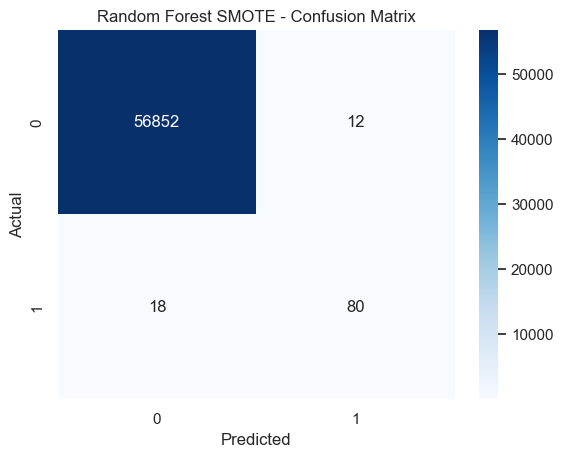

In [99]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest SMOTE - Confusion Matrix')
plt.savefig('rf_cm_smote.png')
plt.show()

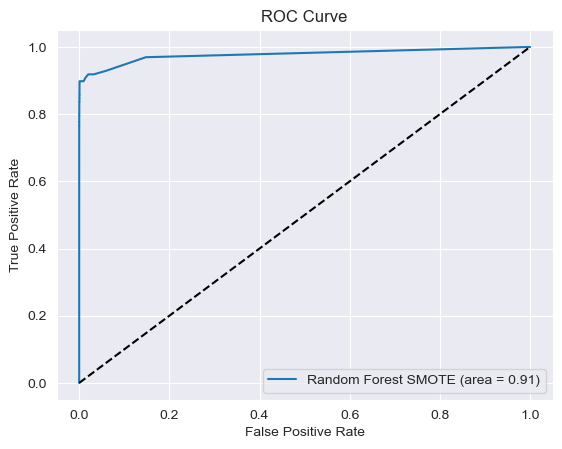

In [33]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_smote.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest SMOTE (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 56,852
- **False Positives (FP):** 12
- **False Negatives (FN):** 18
- **True Positives (TP):** 80


### Analysis

The random forest model with SMOTE resampling shows strong performance across various metrics:

- **Precision:** The precision of 0.870 indicates that when the model predicts a transaction as fraudulent, it is correct 87.0% of the time. This high precision shows that the model makes relatively few false positive errors.
- **Recall:** The recall of 0.816 indicates that the model correctly identifies 81.6% of the actual fraudulent transactions. This is a slight decrease compared to the logistic regression model with SMOTE but still demonstrates strong performance in detecting true positives.
- **F1 Score:** The F1 score of 0.842 balances precision and recall, indicating that the model has a good balance between identifying true positives and minimizing false positives.
- **ROC AUC:** The ROC AUC of 0.908 shows that the model has excellent discriminative ability, performing well in distinguishing between the positive and negative classes.

These results suggest that the random forest model with SMOTE resampling maintains high precision while also achieving good recall. This balance between precision and recall makes it a robust choice for fraud detection. SMOTE helps the model to better identify fraudulent transactions while keeping the number of false positives relatively low compared to logistic regression with SMOTE. Further tuning and hybrid resampling techniques can potentially enhance these results even further.


In [35]:
# Resample the training data using ADASYN
adasyn = ADASYN(random_state=42)
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(x_train, y_train)

In [36]:
y_train_adasyn.value_counts()

Class
1    227457
0    227451
Name: count, dtype: int64

In [37]:
#Train logistic regression model
log_reg_adasyn = LogisticRegression()
log_reg_adasyn.fit(x_train_adasyn, y_train_adasyn)

LogisticRegression()

In [38]:
#predict on the test set
y_pred_log_reg_adasyn = log_reg_adasyn.predict(x_test)

In [39]:
conf_matrix_log_reg_adasyn = confusion_matrix(y_test, y_pred_log_reg_adasyn)
accuracy_log_reg_adasyn = accuracy_score(y_test, y_pred_log_reg_adasyn)
precision_log_reg_adasyn = precision_score(y_test, y_pred_log_reg_adasyn)
recall_log_reg_adasyn = recall_score(y_test, y_pred_log_reg_adasyn)
f1_log_reg_adasyn = f1_score(y_test, y_pred_log_reg_adasyn)
roc_auc_log_reg_adasyn = roc_auc_score(y_test, y_pred_log_reg_adasyn)

In [40]:
# Print Logistic Regression metrics
print(f'Logistic Regression ADASYN - Confusion Matrix:\n{conf_matrix_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - Accuracy: {accuracy_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - Precision: {precision_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - Recall: {recall_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - F1 Score: {f1_log_reg_adasyn}')
print(f'Logistic Regression ADASYN - ROC AUC: {roc_auc_log_reg_adasyn}')

Logistic Regression ADASYN - Confusion Matrix:
[[52131  4733]
 [    8    90]]
Logistic Regression ADASYN - Accuracy: 0.9167690741195885
Logistic Regression ADASYN - Precision: 0.018660584698320548
Logistic Regression ADASYN - Recall: 0.9183673469387755
Logistic Regression ADASYN - F1 Score: 0.036577931314773424
Logistic Regression ADASYN - ROC AUC: 0.917566833289309


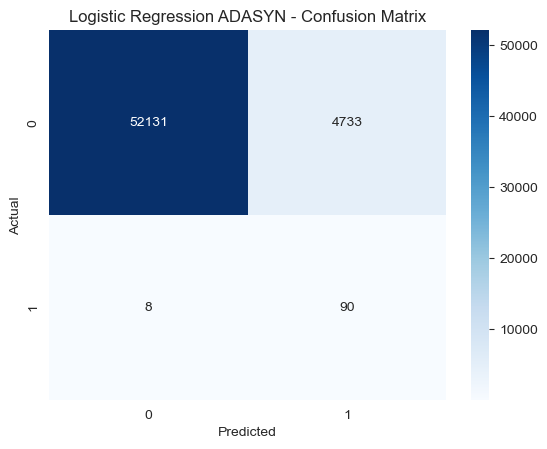

In [41]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_adasyn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression ADASYN - Confusion Matrix')
plt.show()

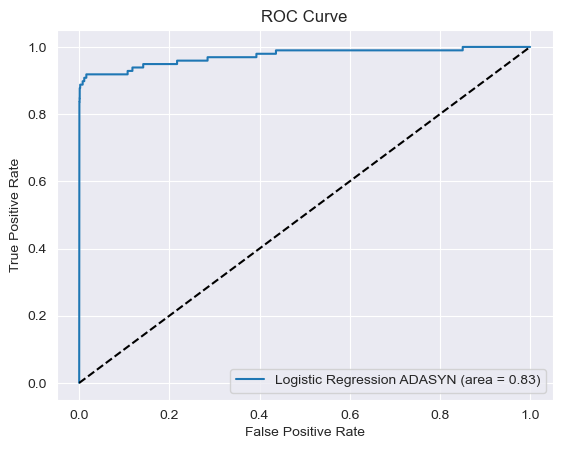

In [42]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_adasyn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression ADASYN (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 52,131
- **False Positives (FP):** 4,733
- **False Negatives (FN):** 8
- **True Positives (TP):** 90

### Analysis

The logistic regression model with ADASYN resampling shows the following performance:

- **Precision:** The precision of 0.019 indicates that when the model predicts a transaction as fraudulent, it is correct only 1.9% of the time. This very low precision is due to a high number of false positives introduced by ADASYN.
- **Recall:** The recall of 0.918 indicates that the model correctly identifies 91.8% of the actual fraudulent transactions. This high recall shows that ADASYN is effective in generating synthetic samples that help the model detect true positives.
- **F1 Score:** The F1 score of 0.037 balances precision and recall, indicating that while the recall has significantly improved, the overall performance is affected by the very low precision.
- **ROC AUC:** The ROC AUC of 0.918 indicates that the model has a strong ability to distinguish between the positive and negative classes, reflecting good discriminative power.

These results suggest that while ADASYN significantly improves the recall, it also introduces a high number of false positives, leading to very low precision. Much like with SMOTE, ADASYN and Logistic Regression would be a poor choice for making Fraud Predictions.


In [43]:
# Train the Random Forest model
rf_adasyn = RandomForestClassifier()
rf_adasyn.fit(x_train_adasyn, y_train_adasyn)

RandomForestClassifier()

In [44]:
# Predict on the test set
y_pred_rf_adasyn = rf_adasyn.predict(x_test)

In [45]:
# Evaluate the Random Forest model
conf_matrix_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)
accuracy_rf_adasyn = accuracy_score(y_test, y_pred_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
roc_auc_rf_adasyn = roc_auc_score(y_test, y_pred_rf_adasyn)

In [46]:
# Print Random Forest metrics
print(f'Random Forest ADASYN - Confusion Matrix:\n{conf_matrix_rf_adasyn}')
print(f'Random Forest ADASYN - Accuracy: {accuracy_rf_adasyn}')
print(f'Random Forest ADASYN - Precision: {precision_rf_adasyn}')
print(f'Random Forest ADASYN - Recall: {recall_rf_adasyn}')
print(f'Random Forest ADASYN - F1 Score: {f1_rf_adasyn}')
print(f'Random Forest ADASYN - ROC AUC: {roc_auc_rf_adasyn}')

Random Forest ADASYN - Confusion Matrix:
[[56852    12]
 [   20    78]]
Random Forest ADASYN - Accuracy: 0.9994382219725431
Random Forest ADASYN - Precision: 0.8666666666666667
Random Forest ADASYN - Recall: 0.7959183673469388
Random Forest ADASYN - F1 Score: 0.8297872340425533
Random Forest ADASYN - ROC AUC: 0.8978536687606951


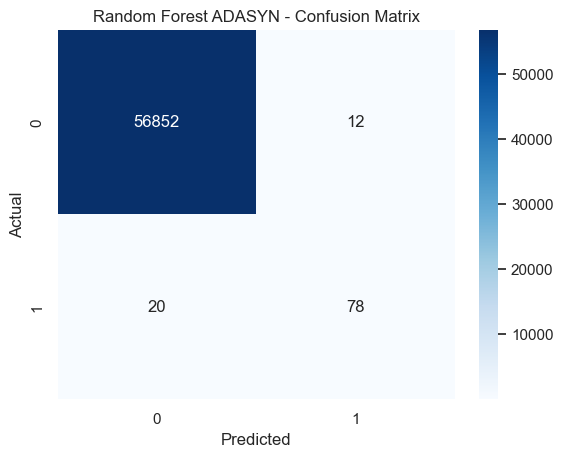

In [100]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_adasyn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest ADASYN - Confusion Matrix')
plt.savefig('rf_cm_adasyn.png')
plt.show()

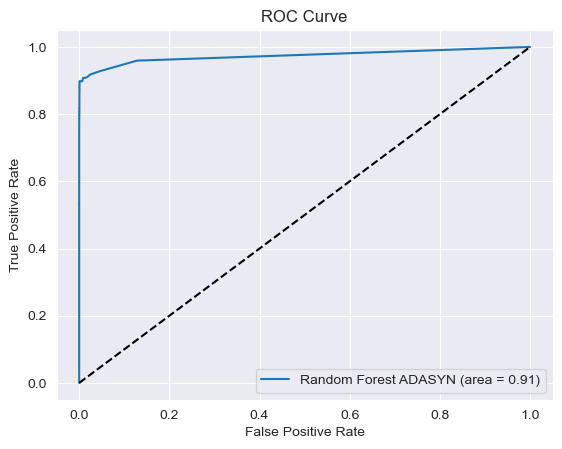

In [48]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_adasyn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest ADASYN (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 56,852
- **False Positives (FP):** 12
- **False Negatives (FN):** 20
- **True Positives (TP):** 78


### Analysis

The random forest model with ADASYN resampling shows robust performance metrics, indicating that it handles the synthetic samples well:

- **Precision:** With a precision of 0.867, the model correctly identifies 86.7% of predicted fraudulent transactions, suggesting a relatively low number of false positives.
- **Recall:** A recall of 0.796 indicates that the model successfully detects approximately 79.6% of actual fraudulent transactions. This is slightly lower than the model's performance with SMOTE but still strong.
- **F1 Score:** The F1 score of 0.830 reflects a good balance between precision and recall, demonstrating that the model maintains solid performance across both metrics.
- **ROC AUC:** The ROC AUC of 0.898 shows excellent discriminative ability, indicating that the model is effective at distinguishing between fraudulent and non-fraudulent transactions.

Overall, the random forest model with ADASYN resampling demonstrates strong performance, effectively balancing the detection of true positives with a relatively low rate of false positives. While the recall is slightly lower compared to SMOTE, the model still performs well, making it a reliable option for fraud detection. 


In [50]:
# Resample the training data using SMOTE TOMEK
smote_tomek = SMOTETomek(random_state=42)
x_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(x_train, y_train)

In [51]:
y_train_smote_tomek.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [52]:
#Train logistic regression model
log_reg_smote_tomek = LogisticRegression()
log_reg_smote_tomek.fit(x_train_smote_tomek, y_train_smote_tomek)

LogisticRegression()

In [53]:
#predict on the test set
y_pred_log_reg_smote_tomek = log_reg_smote_tomek.predict(x_test)

In [54]:
conf_matrix_log_reg_smote_tomek = confusion_matrix(y_test, y_pred_log_reg_smote_tomek)
accuracy_log_reg_smote_tomek = accuracy_score(y_test, y_pred_log_reg_smote_tomek)
precision_log_reg_smote_tomek = precision_score(y_test, y_pred_log_reg_smote_tomek)
recall_log_reg_smote_tomek = recall_score(y_test, y_pred_log_reg_smote_tomek)
f1_log_reg_smote_tomek = f1_score(y_test, y_pred_log_reg_smote_tomek)
roc_auc_log_reg_smote_tomek = roc_auc_score(y_test, y_pred_log_reg_smote_tomek)

In [55]:
# Print Logistic Regression metrics
print(f'Logistic Regression SMOTE TOMEK - Confusion Matrix:\n{conf_matrix_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - Accuracy: {accuracy_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - Precision: {precision_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - Recall: {recall_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - F1 Score: {f1_log_reg_smote_tomek}')
print(f'Logistic Regression SMOTE TOMEK - ROC AUC: {roc_auc_log_reg_smote_tomek}')

Logistic Regression SMOTE TOMEK - Confusion Matrix:
[[55401  1463]
 [    8    90]]
Logistic Regression SMOTE TOMEK - Accuracy: 0.9741757663003405
Logistic Regression SMOTE TOMEK - Precision: 0.05795235028976175
Logistic Regression SMOTE TOMEK - Recall: 0.9183673469387755
Logistic Regression SMOTE TOMEK - F1 Score: 0.10902483343428225
Logistic Regression SMOTE TOMEK - ROC AUC: 0.9463196470203162


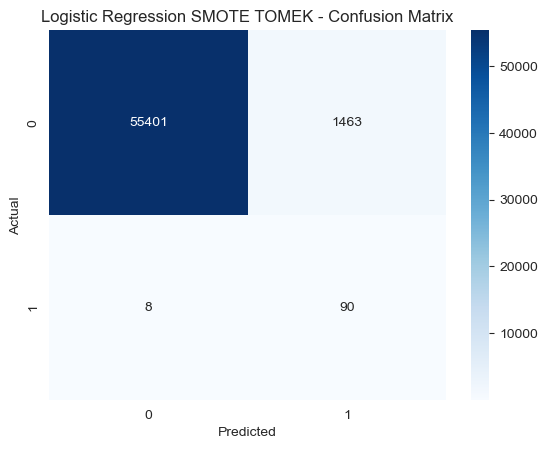

In [56]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_smote_tomek, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression SMOTE TOMEK - Confusion Matrix')
plt.show()

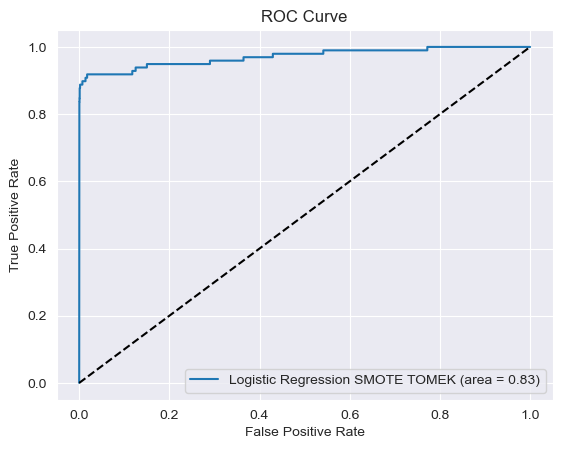

In [57]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote_tomek.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression SMOTE TOMEK (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 55,401
- **False Positives (FP):** 1,463
- **False Negatives (FN):** 8
- **True Positives (TP):** 90


### Analysis

The logistic regression model with SMOTE Tomek resampling yields the following results:

- **Precision:** The precision of 0.058 indicates that only 5.8% of the predicted fraudulent transactions are actually fraud. This low precision is due to the high number of false positives introduced by SMOTE Tomek.
- **Recall:** The recall of 0.918 shows that the model successfully identifies 91.8% of actual fraudulent transactions. This high recall is similar to that achieved with SMOTE alone, demonstrating the effectiveness of SMOTE Tomek in increasing true positive detection.
- **F1 Score:** The F1 score of 0.109 balances the low precision and high recall, indicating overall moderate performance.
- **ROC AUC:** The ROC AUC of 0.946 demonstrates strong ability in distinguishing between fraudulent and non-fraudulent transactions, which is a significant improvement compared to the original imbalanced model.

These results indicate that while SMOTE Tomek improves recall considerably, it also introduces a substantial number of false positives, leading to very low precision. This is not surprising given that logistic regression might not be the best choice for this problem. Logistic regression assumes a linear relationship between the independent variables and the log odds of the dependent variable, which may not capture the complex patterns in the data necessary for effective fraud detection. This linearity assumption, coupled with the presence of many outliers (false positives), suggests that more sophisticated models like ensemble methods or neural networks might perform better in this context.


In [58]:
# Train the Random Forest model
rf_smote_tomek = RandomForestClassifier()
rf_smote_tomek.fit(x_train_smote_tomek, y_train_smote_tomek)

RandomForestClassifier()

In [59]:
# Predict on the test set
y_pred_rf_smote_tomek = rf_smote_tomek.predict(x_test)

In [60]:
# Evaluate the Random Forest model
conf_matrix_rf_smote_tomek = confusion_matrix(y_test, y_pred_rf_smote_tomek)
accuracy_rf_smote_tomek = accuracy_score(y_test, y_pred_rf_smote_tomek)
precision_rf_smote_tomek = precision_score(y_test, y_pred_rf_smote_tomek)
recall_rf_smote_tomek = recall_score(y_test, y_pred_rf_smote_tomek)
f1_rf_smote_tomek = f1_score(y_test, y_pred_rf_smote_tomek)
roc_auc_rf_smote_tomek = roc_auc_score(y_test, y_pred_rf_smote_tomek)

In [61]:
# Print Random Forest metrics
print(f'Random Forest SMOTE TOMEK - Confusion Matrix:\n{conf_matrix_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - Accuracy: {accuracy_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - Precision: {precision_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - Recall: {recall_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - F1 Score: {f1_rf_smote_tomek}')
print(f'Random Forest SMOTE TOMEK - ROC AUC: {roc_auc_rf_smote_tomek}')

Random Forest SMOTE TOMEK - Confusion Matrix:
[[56854    10]
 [   18    80]]
Random Forest SMOTE TOMEK - Accuracy: 0.9995084442259752
Random Forest SMOTE TOMEK - Precision: 0.8888888888888888
Random Forest SMOTE TOMEK - Recall: 0.8163265306122449
Random Forest SMOTE TOMEK - F1 Score: 0.851063829787234
Random Forest SMOTE TOMEK - ROC AUC: 0.9080753362121439


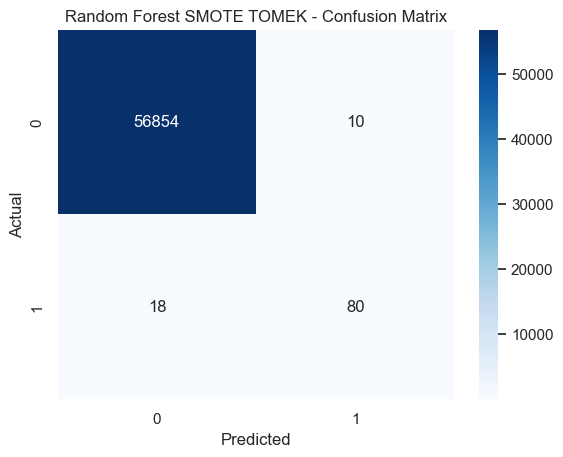

In [101]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_smote_tomek, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest SMOTE TOMEK - Confusion Matrix')
plt.savefig('rf_cm_smotetomek.png')
plt.show()

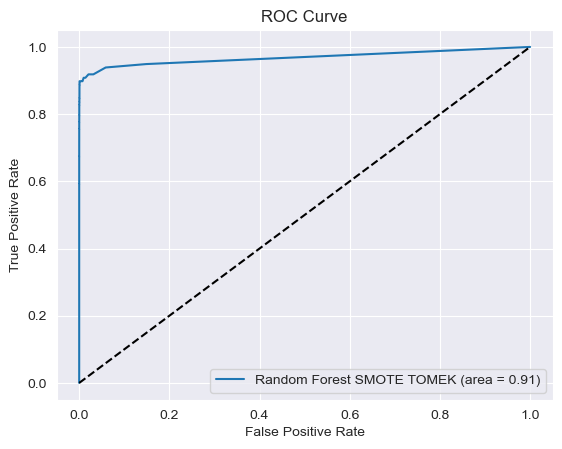

In [63]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_smote_tomek.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest SMOTE TOMEK (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 56,854
- **False Positives (FP):** 10
- **False Negatives (FN):** 18
- **True Positives (TP):** 80


### Analysis

The random forest model with SMOTE Tomek resampling demonstrates strong performance across various metrics:

- **Precision:** The precision of 0.889 indicates that when the model predicts a transaction as fraudulent, it is correct 88.9% of the time. This high precision shows that the model makes relatively few false positive errors.
- **Recall:** The recall of 0.816 indicates that the model correctly identifies 81.6% of actual fraudulent transactions. This is a significant improvement over the logistic regression model with SMOTE Tomek, showing better performance in detecting fraud.
- **F1 Score:** The F1 score of 0.851 balances precision and recall, indicating that the model has a good ability to detect true positives while minimizing false positives.
- **ROC AUC:** The ROC AUC of 0.908 demonstrates excellent discriminative ability, indicating that the model is effective at distinguishing between fraudulent and non-fraudulent transactions.

These results suggest that the random forest model with SMOTE Tomek resampling maintains high precision while also achieving good recall, making it a robust choice for fraud detection. The combination of SMOTE and Tomek Links helps to balance the class distribution and clean the dataset, leading to improved model performance. This highlights the advantage of using ensemble methods like random forest, which can handle complex patterns and relationships in the data more effectively than simpler models like logistic regression.


In [65]:
# Resample the training data using SMOTE ENN
smote_enn = SMOTEENN(random_state=42)
x_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(x_train, y_train)

In [66]:
y_train_smote_enn.value_counts()

Class
1    227451
0    227058
Name: count, dtype: int64

In [67]:
#Train logistic regression model
log_reg_smote_enn = LogisticRegression()
log_reg_smote_enn.fit(x_train_smote_enn, y_train_smote_enn)

LogisticRegression()

In [68]:
#predict on the test set
y_pred_log_reg_smote_enn = log_reg_smote_enn.predict(x_test)

In [69]:
conf_matrix_log_reg_smote_enn = confusion_matrix(y_test, y_pred_log_reg_smote_enn)
accuracy_log_reg_smote_enn = accuracy_score(y_test, y_pred_log_reg_smote_enn)
precision_log_reg_smote_enn = precision_score(y_test, y_pred_log_reg_smote_enn)
recall_log_reg_smote_enn = recall_score(y_test, y_pred_log_reg_smote_enn)
f1_log_reg_smote_enn = f1_score(y_test, y_pred_log_reg_smote_enn)
roc_auc_log_reg_smote_enn = roc_auc_score(y_test, y_pred_log_reg_smote_enn)

In [70]:
# Print Logistic Regression metrics
print(f'Logistic Regression SMOTE ENN - Confusion Matrix:\n{conf_matrix_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - Accuracy: {accuracy_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - Precision: {precision_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - Recall: {recall_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - F1 Score: {f1_log_reg_smote_enn}')
print(f'Logistic Regression SMOTE ENN - ROC AUC: {roc_auc_log_reg_smote_enn}')

Logistic Regression SMOTE ENN - Confusion Matrix:
[[55346  1518]
 [    8    90]]
Logistic Regression SMOTE ENN - Accuracy: 0.973210210315649
Logistic Regression SMOTE ENN - Precision: 0.055970149253731345
Logistic Regression SMOTE ENN - Recall: 0.9183673469387755
Logistic Regression SMOTE ENN - F1 Score: 0.10550996483001172
Logistic Regression SMOTE ENN - ROC AUC: 0.945836037003434


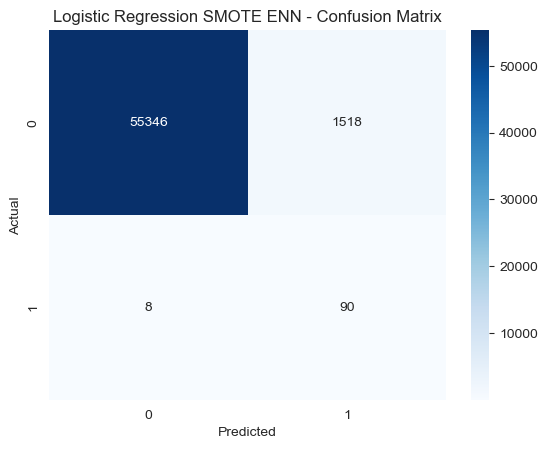

In [71]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_log_reg_smote_enn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression SMOTE ENN - Confusion Matrix')
plt.show()

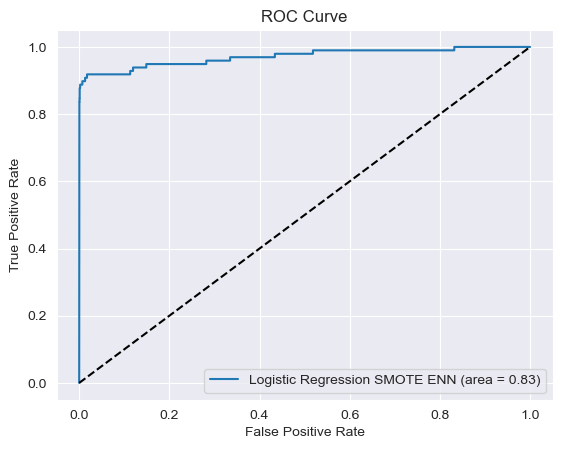

In [72]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_smote_enn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression SMOTE ENN (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 55,346
- **False Positives (FP):** 1,518
- **False Negatives (FN):** 8
- **True Positives (TP):** 90

### Analysis

The logistic regression model with SMOTE ENN resampling yields the following results:

- **Precision:** The precision of 0.056 indicates that only 5.6% of the predicted fraudulent transactions are actually fraud. This low precision is due to the high number of false positives introduced by SMOTE ENN.
- **Recall:** The recall of 0.918 shows that the model successfully identifies 91.8% of actual fraudulent transactions. This high recall is similar to that achieved with SMOTE alone, demonstrating the effectiveness of SMOTE ENN in increasing true positive detection.
- **F1 Score:** The F1 score of 0.106 balances the low precision and high recall, indicating overall moderate performance.
- **ROC AUC:** The ROC AUC of 0.946 demonstrates strong ability in distinguishing between fraudulent and non-fraudulent transactions, which is a significant improvement compared to the original imbalanced model.

These results indicate that while SMOTE ENN improves recall considerably, it also introduces a substantial number of false positives, leading to very low precision. This is not surprising given that logistic regression might not be the best choice for this problem. Logistic regression assumes a linear relationship between the independent variables and the log odds of the dependent variable, which may not capture the complex patterns in the data necessary for effective fraud detection. This linearity assumption, coupled with the presence of many outliers (false positives), suggests that more sophisticated models like ensemble methods or neural networks might perform better in this context. 

I am including these results for the sake of the project process and educational aspects. It is clear that logistic regression is ruled out as an effective model for this problem.


In [73]:
# Train the Random Forest model
rf_smote_enn = RandomForestClassifier()
rf_smote_enn.fit(x_train_smote_enn, y_train_smote_enn)

RandomForestClassifier()

In [74]:
# Predict on the test set
y_pred_rf_smote_enn = rf_smote_enn.predict(x_test)

In [75]:
# Evaluate the Random Forest model
conf_matrix_rf_smote_enn = confusion_matrix(y_test, y_pred_rf_smote_enn)
accuracy_rf_smote_enn = accuracy_score(y_test, y_pred_rf_smote_enn)
precision_rf_smote_enn = precision_score(y_test, y_pred_rf_smote_enn)
recall_rf_smote_enn = recall_score(y_test, y_pred_rf_smote_enn)
f1_rf_smote_enn = f1_score(y_test, y_pred_rf_smote_enn)
roc_auc_rf_smote_enn = roc_auc_score(y_test, y_pred_rf_smote_enn)

In [76]:
# Print Random Forest metrics
print(f'Random Forest SMOTE ENN - Confusion Matrix:\n{conf_matrix_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - Accuracy: {accuracy_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - Precision: {precision_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - Recall: {recall_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - F1 Score: {f1_rf_smote_enn}')
print(f'Random Forest SMOTE ENN - ROC AUC: {roc_auc_rf_smote_enn}')

Random Forest SMOTE ENN - Confusion Matrix:
[[56842    22]
 [   17    81]]
Random Forest SMOTE ENN - Accuracy: 0.9993153330290369
Random Forest SMOTE ENN - Precision: 0.7864077669902912
Random Forest SMOTE ENN - Recall: 0.826530612244898
Random Forest SMOTE ENN - F1 Score: 0.8059701492537313
Random Forest SMOTE ENN - ROC AUC: 0.9130718621156959


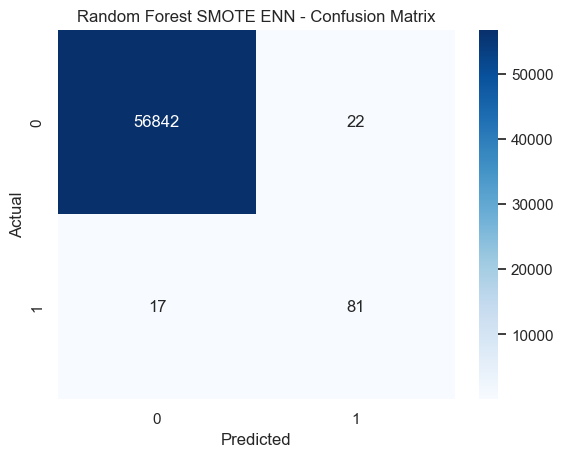

In [102]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_rf_smote_enn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest SMOTE ENN - Confusion Matrix')
plt.savefig('rf_cm_smoteenn')
plt.show()

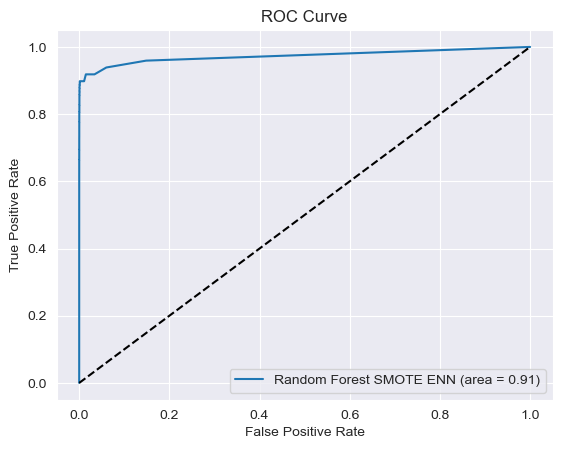

In [78]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_smote_enn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest SMOTE ENN (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Interpretation

The confusion matrix shows the following:

- **True Negatives (TN):** 56,842
- **False Positives (FP):** 22
- **False Negatives (FN):** 17
- **True Positives (TP):** 81


### Analysis

The random forest model with SMOTE ENN resampling shows strong and balanced performance:

- **Precision:** The precision of 0.786 indicates that when the model predicts a transaction as fraudulent, it is correct 78.6% of the time. This high precision shows that the model makes relatively few false positive errors.
- **Recall:** The recall of 0.827 indicates that the model correctly identifies 82.7% of actual fraudulent transactions. This demonstrates the model's strong performance in detecting fraud.
- **F1 Score:** The F1 score of 0.806 balances precision and recall, indicating that the model maintains good overall performance.
- **ROC AUC:** The ROC AUC of 0.913 shows excellent discriminative ability, indicating that the model is effective at distinguishing between fraudulent and non-fraudulent transactions.

These results suggest that the random forest model with SMOTE ENN resampling performs well in terms of both precision and recall, making it a good choice for fraud detection. The combination of SMOTE and ENN helps to balance the class distribution and clean the dataset, leading to improved model performance.


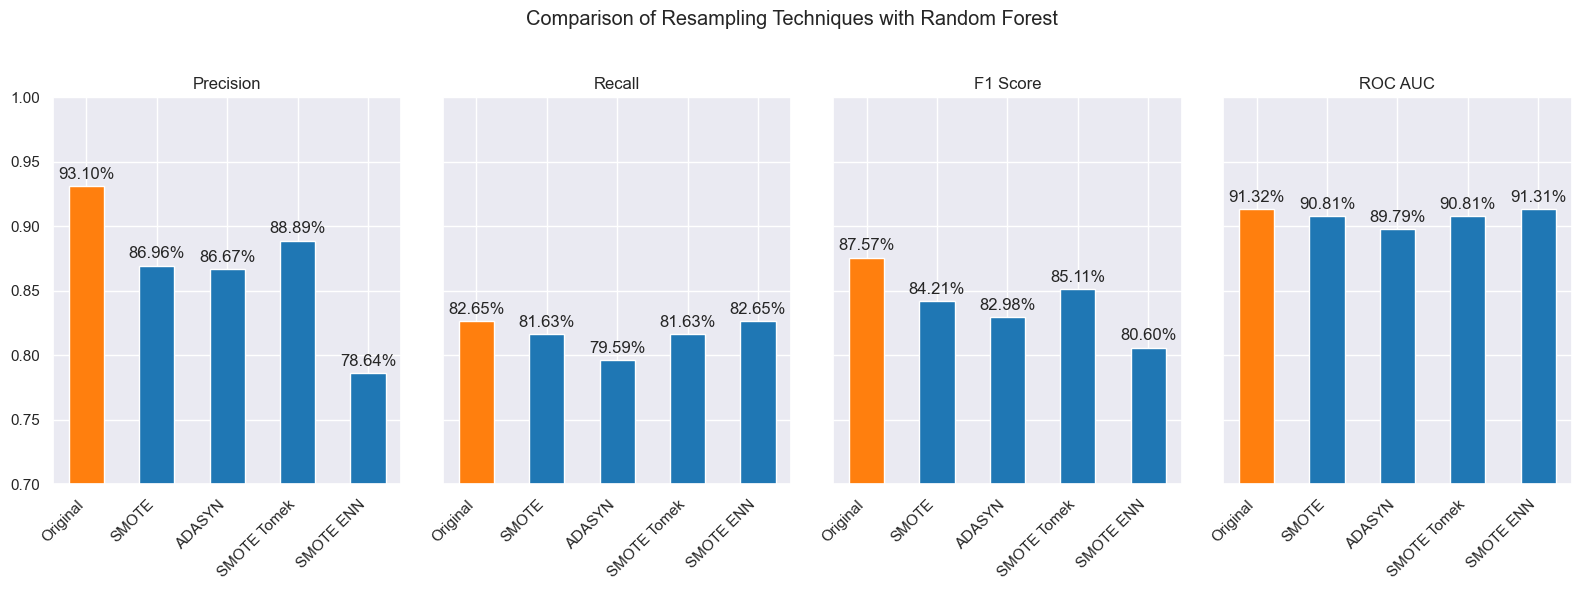

In [103]:
# Visualize the Findings
techniques = ['Original', 'SMOTE', 'ADASYN', 'SMOTE Tomek', 'SMOTE ENN']
precision = [precision_rf, precision_rf_smote, precision_rf_adasyn, precision_rf_smote_tomek, precision_rf_smote_enn]
recall = [recall_rf, recall_rf_smote, recall_rf_adasyn, recall_rf_smote_tomek, recall_rf_smote_enn]
f1_score = [f1_rf, f1_rf_smote, f1_rf_adasyn, f1_rf_smote_tomek, f1_rf_smote_enn]
roc_auc = [roc_auc_rf, roc_auc_rf_smote, roc_auc_rf_adasyn, roc_auc_rf_smote_tomek, roc_auc_rf_smote_enn]

metrics = ['Precision', 'Recall', 'F1 Score', 'ROC AUC']
data = [precision, recall, f1_score, roc_auc]

fig, axs = plt.subplots(1, 4, figsize=(16, 6), sharey=True)  

for ax, metric, values in zip(axs, metrics, data):
    colors = ['#1f77b4'] * len(values)
    max_index = np.argmax(values)
    colors[max_index] = '#ff7f0e'  
    rects = ax.bar(techniques, values, width=0.5, color=colors)
    ax.set_title(metric)
    ax.set_xticks(np.arange(len(techniques)))
    ax.set_xticklabels(techniques, rotation=45, ha='right')
    ax.set_ylim(0.7, 1.0)  
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

fig.suptitle('Comparison of Resampling Techniques with Random Forest')
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.savefig('resampling_techniques_comparison.png')
plt.show()
